# Linear Regression 线性回归

Name: [Your name]

Skeleton framework for you to fill in (Code you need to provide is marked by `###`):

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt  
import numpy as np 
from numpy.linalg import *
import pandas as pd

In [2]:
def LR_train( x , y , lamb=0.0001 ):
    """
    Function: Calculate the regression coefficient
    Input:    
              x:    Training data, size: [num_sample dimension]
              y:    Training label, size: [num_sample 1]
              lamb: The regularization coefficient
    Outpyt:   
              w:    Regression coefficient
    """
    [m, d] = x.shape
    # The variable m is the number of the training data. 
    #The variable d is the dimension of the training data.
    x = np.column_stack( ((np.ones(m)).T , x) )
    
    # Your code
    # Here you should calculate the weight.
    w = ###
    
    return w

In [3]:
def LR_test( x , y, w, problem_type='regression' ):
    """
    Function: Predict the testing data
    Input:    
              x: Testing data, size: [num_sample dimension]
              y: Testing label, size: [num_sample 1]
              w: Regression coefficient, size: [dimension+1 1]
              problem_type: The type of problem which you want to slove. Only regression and classification
    Output:   
              t: Prediction of testing data
    """
    # Predict the testing data
    m, d = x.shape
    
    x = np.column_stack( ((np.ones(m)).T , x) )
    # Your code
    # Here, the variable t is the prediction of testing data, and you should calculate it.
    t = ###
    
    # Three kinds of errors
    er = t - y
    MSE = (er**2).mean()                      # Mean Squared Error
    MAE = abs(er).mean()                      # Average Absolute Error
    SD = np.sqrt((( er-er.mean())**2).mean()) # Error Standard Deviation
    
    if problem_type=='classification':
        acc = np.equal(np.rint(t), y).mean() * 100
        text = "The Linear Regression's accuracy is %.2f%%." %(acc)
        print(text)
    
    obj = pd.Series([MSE,MAE,SD], index=['MSE','MAE','SD'])
    print(obj)
    
    return t

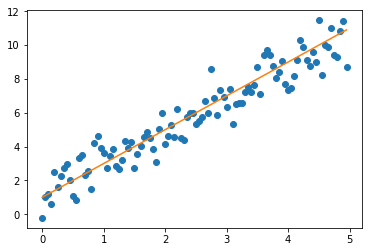

In [4]:
# Create data
w = np.array([[1.0], [2.0]])
x = np.arange(0,5,5/100)
x = np.column_stack( ((np.ones(100)) , x) )
true_y = np.dot(x, w)
noise_y = true_y + np.random.randn(100,1)
true_y = np.round(true_y, 2)

plt.plot(x[:,1], noise_y, 'o')
plt.plot(x[:,1], np.dot(x, w))
plt.show()

MSE    0.056222
MAE    0.196264
SD     0.197832
dtype: float64


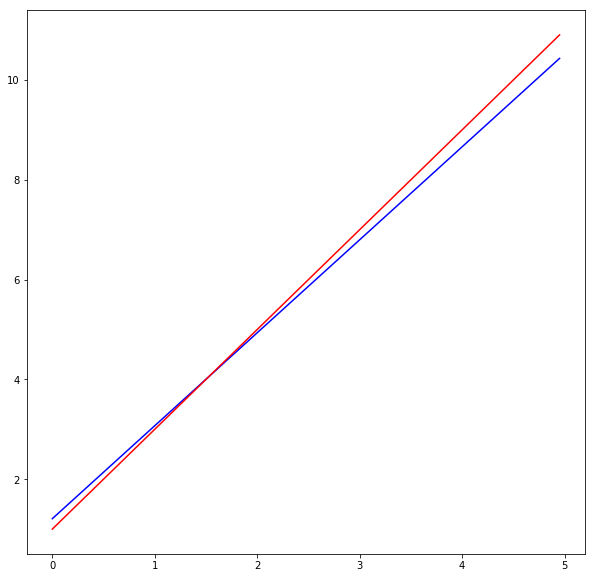

The blue one is the Linear Regression estimated parameters. The red one is the true parameters.


In [5]:
pred_w = LR_train(x, noise_y)
t = LR_test(x, true_y, pred_w)
plt.figure(figsize=(10,10)) 
plt.plot(x[:,1], t, 'b')
plt.plot(x[:,1], np.dot(x, w), 'r')
plt.show()
print('The blue one is the Linear Regression estimated parameters. The red one is the true parameters.')

In [6]:
# Import data
# data_path = ### "The path where you store the SpectralClassification data" ###
data_path = "G://three set/SpectralClassification/No removal of continuous spectrum/"

data=sio.loadmat(data_path + "SpectralClassificationTrain.mat") 
train_x = data['train_x']
train_y = np.reshape(data['train_y'][:,0], [-1,1])

data=sio.loadmat(data_path + "SpectralClassificationTest.mat") 
test_x = data['test_x']
test_y = np.reshape(data['test_y'][:,0], [-1,1])

del data

In [7]:
w = LR_train(train_x, train_y)
t = LR_test(test_x , test_y , w, problem_type='classification')

The Linear Regression's accuracy is 82.50%.
MSE    0.264380
MAE    0.337140
SD     0.495198
dtype: float64
